In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- CONFIGURATION ---
# Add 'src' to the system path so we can import our modules
# Adjust '..' if your notebook is in a different subfolder
sys.path.append('../src')

# Define where we will save the final results for Task 3
OUTPUT_PATH = Path("../results/change_point_results.csv")

# Set visual style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)

print("Imports ready.")

Imports ready.


In [2]:
# Import our custom modules
from data_preprocessing import get_merged_data
from Change_point_model import WindowedChangePointModel

# 1. Load the merged data (Prices + Key Events)
prices, events = get_merged_data()

# 2. Initialize the Bayesian Model
model = WindowedChangePointModel(prices)

print(f"\nLoaded {len(prices)} days of price data.")
print(f"Loaded {len(events)} key events to analyze.")

Loading price data from: /Users/admin/week11/brent-oil-bayesian-change-point-analysis/Backend/data/raw/BrentOilPrices.csv
Successfully loaded 9010 price records.
Date Range: 1987-05-21 to 2022-11-14
Loading event data from: /Users/admin/week11/brent-oil-bayesian-change-point-analysis/Backend/data/processed/key_events.csv
Successfully loaded 22 events.

Loaded 9010 days of price data.
Loaded 22 key events to analyze.


In [3]:
import arviz as az

def plot_change_point(trace, window_df, event_name, expected_date):
    """
    Plots the price volatility and the detected change point posterior.
    """
    if trace is None: return

    # 1. Extract Data
    posterior_tau = trace.posterior['tau'].values.flatten()
    detected_idx = int(pd.Series(posterior_tau).mode()[0])
    detected_date = window_df.index[detected_idx]

    # 2. Setup Plot
    fig, ax1 = plt.subplots(figsize=(15, 6))

    # Plot Log Returns (Volatility)
    ax1.plot(window_df.index, window_df['Log_Return'], color='gray', alpha=0.6, label='Daily Log Returns')
    ax1.set_ylabel('Log Return (Volatility)', fontsize=12)

    # Plot Expected vs Detected Dates
    ax1.axvline(pd.to_datetime(expected_date), color='green', linestyle='--', linewidth=2, label=f'Event Date: {expected_date}')
    ax1.axvline(detected_date, color='red', linewidth=2, label=f'Detected Shift: {detected_date.date()}')

    # Plot Posterior Density (Probability of Change) on secondary axis
    ax2 = ax1.twinx()
    sns.kdeplot(window_df.index[posterior_tau], ax=ax2, color='red', fill=True, alpha=0.3, label='Change Point Probability')
    ax2.set_yticks([]) # Hide secondary y-axis ticks

    # Titles & Legend
    plt.title(f"Structural Break Analysis: {event_name}", fontsize=16, fontweight='bold')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()

def calculate_metrics(trace, window_df, event_name, expected_date):
    """
    Calculates the percentage change in volatility (Sigma).
    """
    if trace is None: return None

    # Extract Means of Volatility (Sigma)
    sigma_1 = trace.posterior['sigma_1'].mean().item()
    sigma_2 = trace.posterior['sigma_2'].mean().item()

    # Calculate % Change
    pct_change = ((sigma_2 - sigma_1) / sigma_1) * 100

    # Detect exact date
    posterior_tau = trace.posterior['tau'].values.flatten()
    detected_idx = int(pd.Series(posterior_tau).mode()[0])
    detected_date = window_df.index[detected_idx]

    return {
        'Event_Name': event_name,
        'Expected_Date': expected_date,
        'Detected_Date': detected_date.strftime('%Y-%m-%d'),
        'Volatility_Pre': round(sigma_1, 5),
        'Volatility_Post': round(sigma_2, 5),
        'Volatility_Change_Pct': round(pct_change, 2)
    }

Starting Robust Bayesian Analysis on 22 events...
--> Processing: First Gulf War...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


    [SIGNIFICANT] Volatility shift: 204.17%


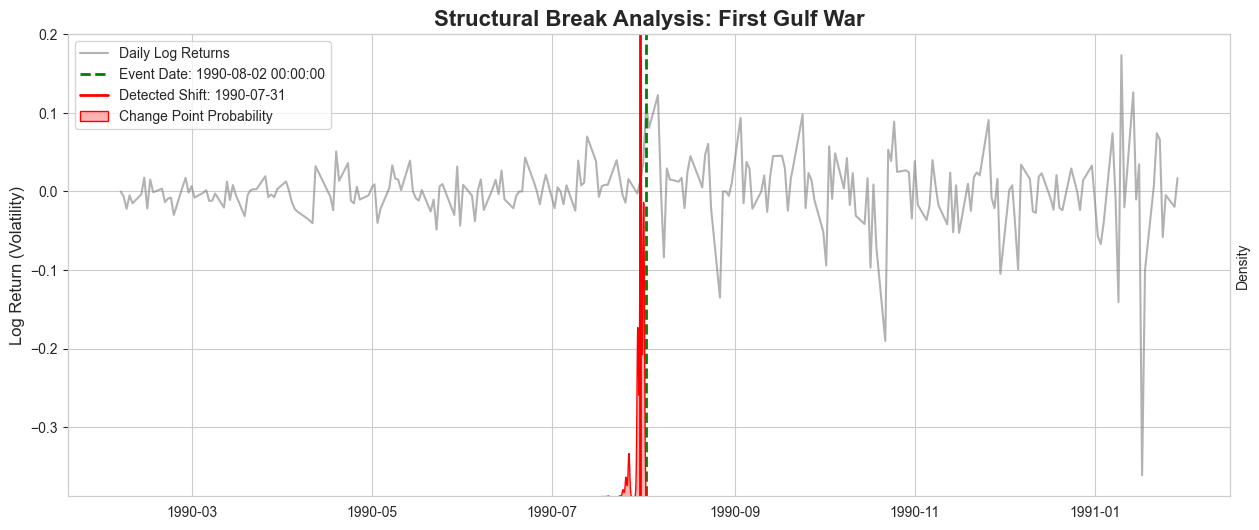

--> Processing: Asian Financial Crisis...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [Minor] Change 6.73% (No Plot)
--> Processing: OPEC Coordinated Production Cuts...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: -28.79%


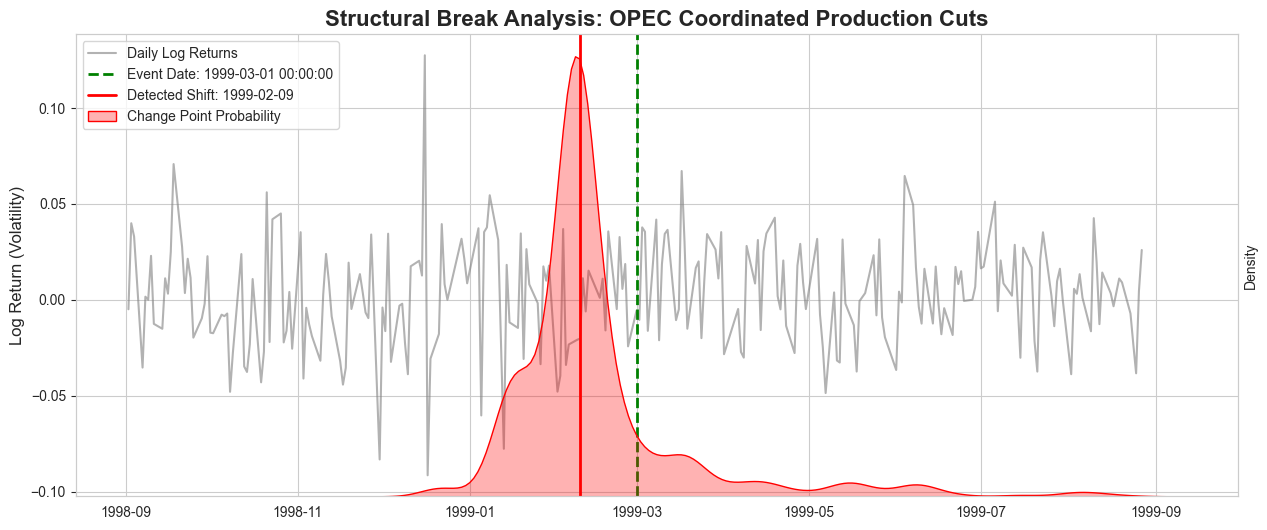

--> Processing: September 11 Attacks...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


    [SIGNIFICANT] Volatility shift: 89.71%


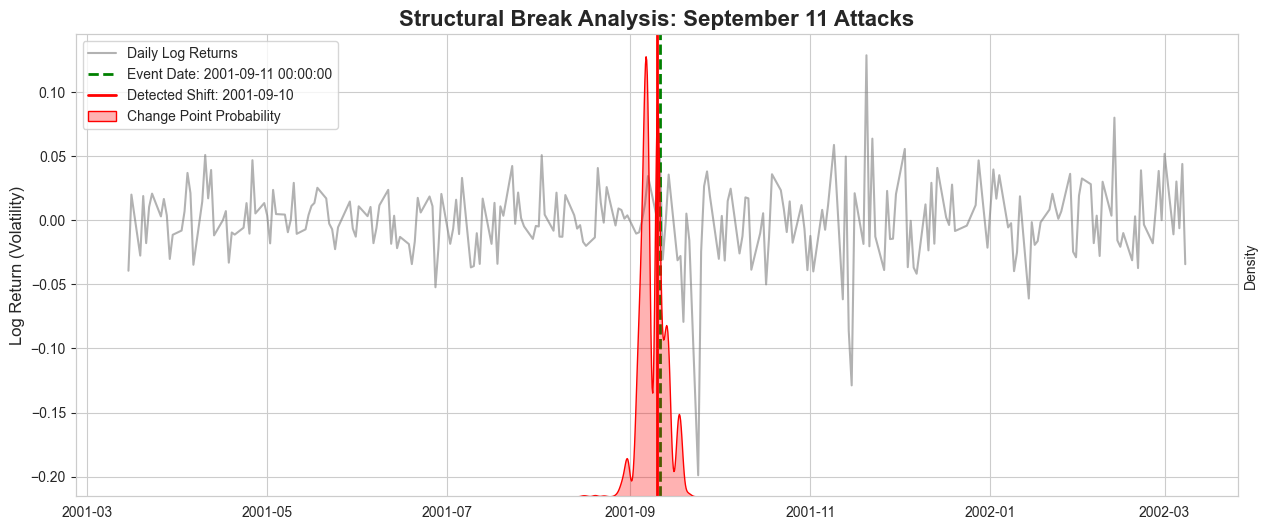

--> Processing: Iraq War...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: 34.61%


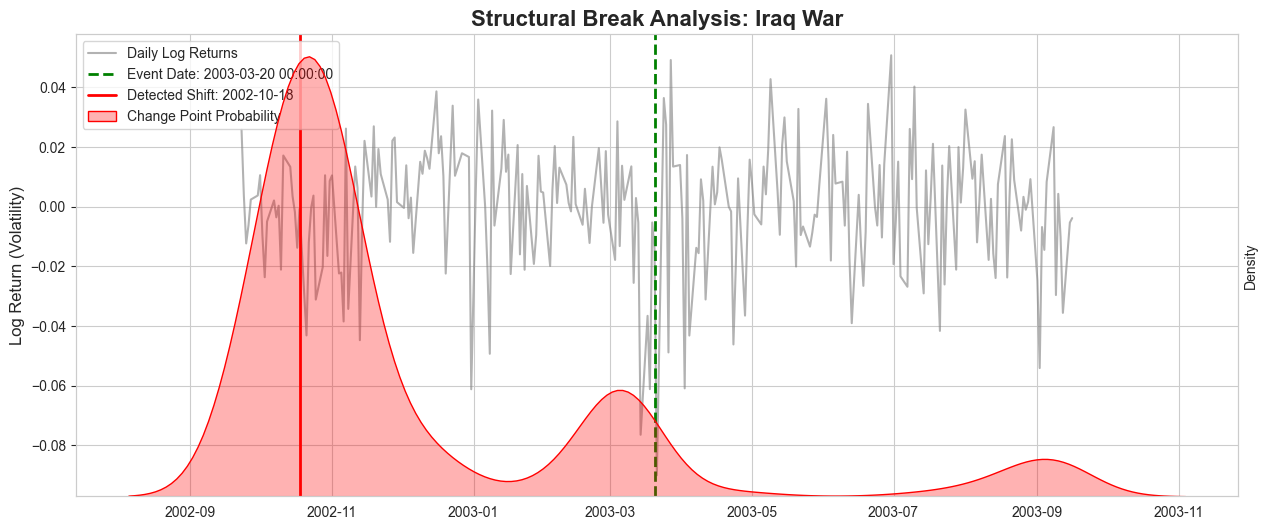

--> Processing: Global Financial Crisis...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: 113.87%


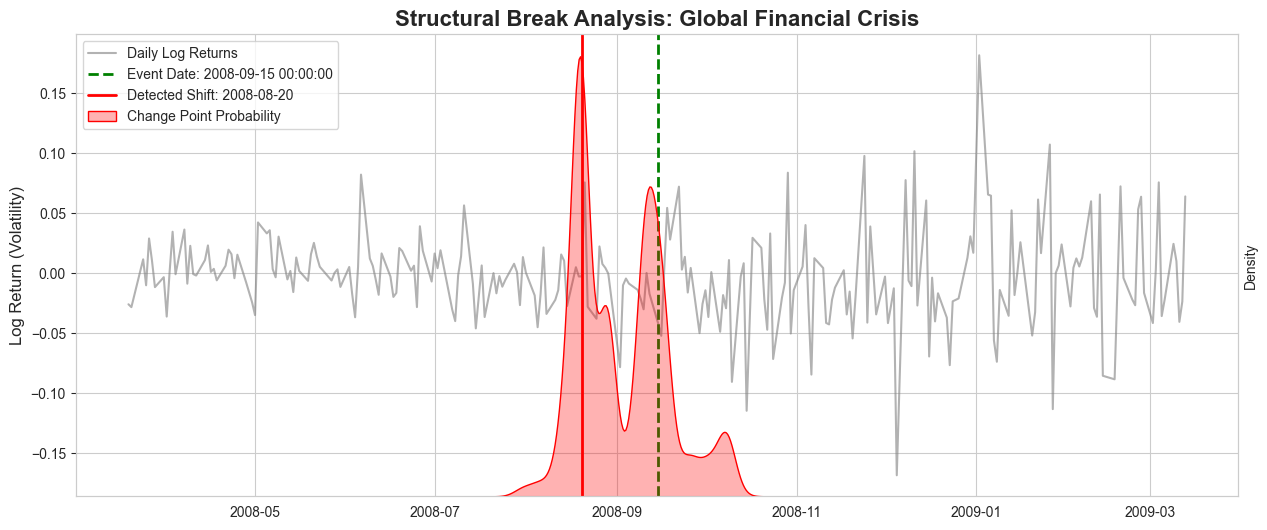

--> Processing: Arab Spring...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: 38.51%


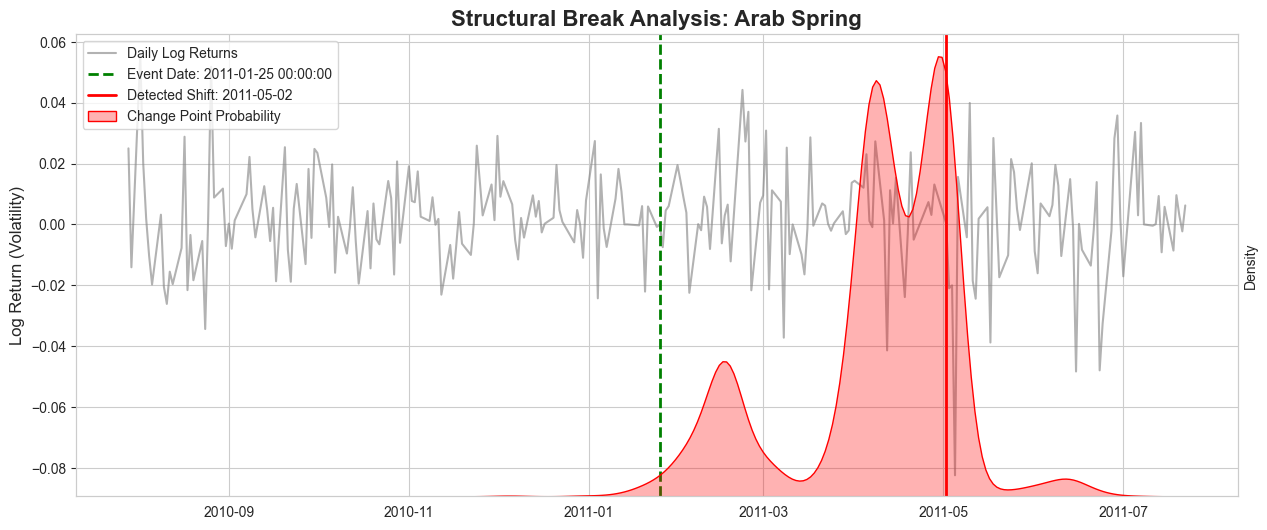

--> Processing: Libyan Civil War...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: 47.67%


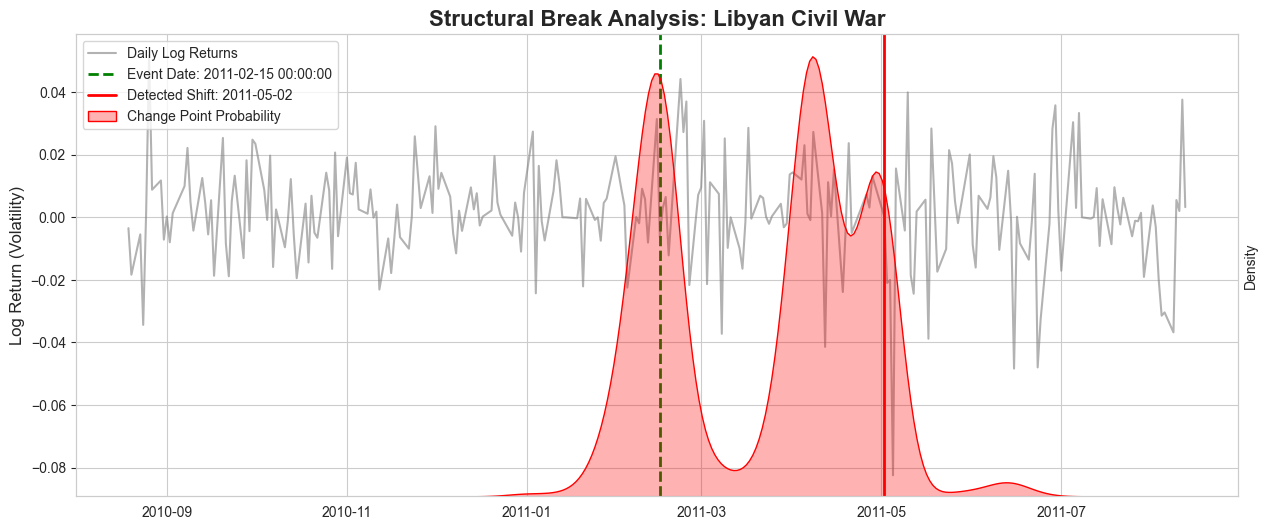

--> Processing: Iran Nuclear Sanctions...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
There were 615 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: 21.87%


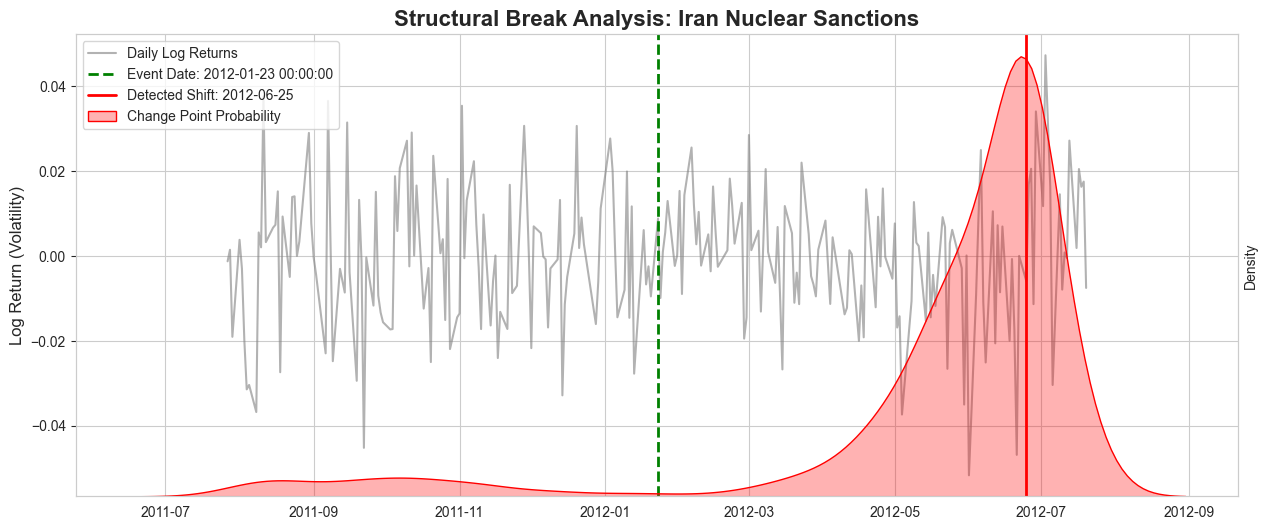

--> Processing: Russia–Ukraine Crimea Conflict...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [Minor] Change -18.24% (No Plot)
--> Processing: OPEC Decision to Maintain Output...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: 170.45%


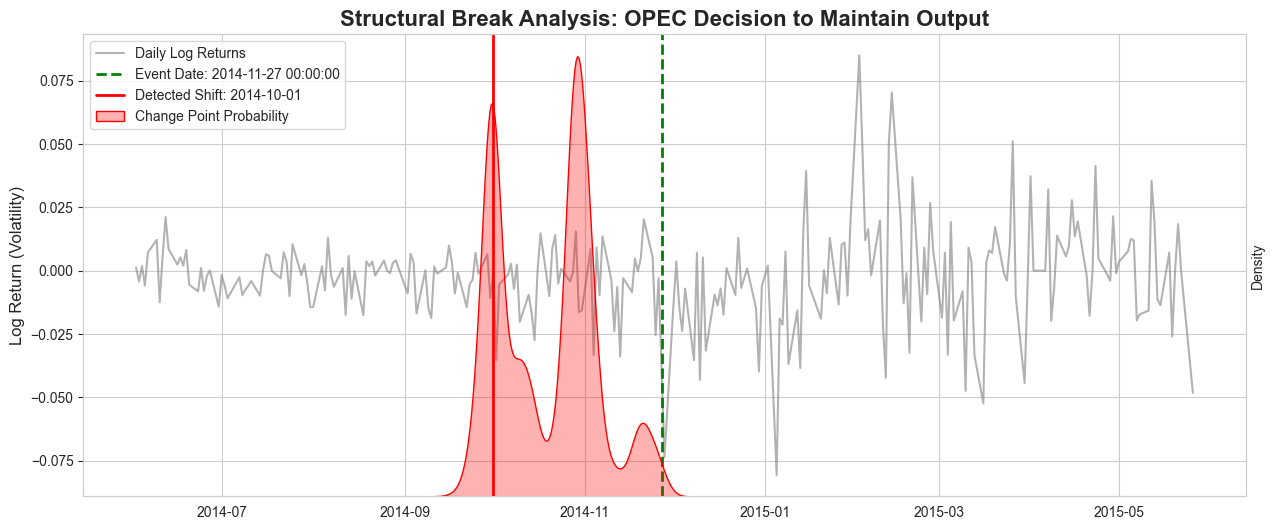

--> Processing: China Stock Market Crash...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: 90.43%


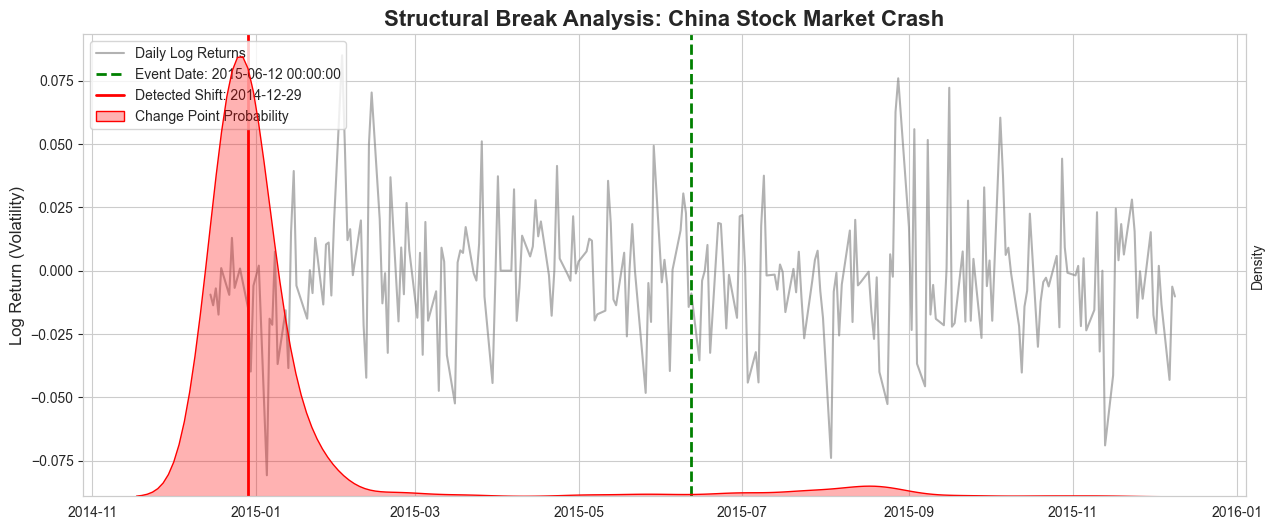

--> Processing: OPEC and Non-OPEC Production Cut Agreement...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: -32.13%


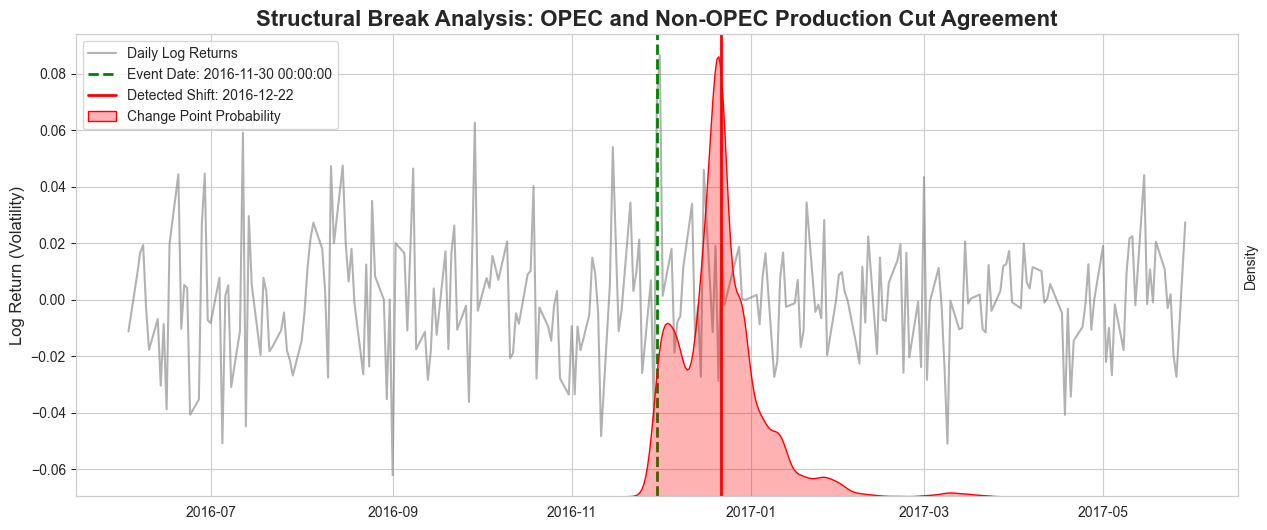

--> Processing: US Sanctions on Venezuela...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: -29.04%


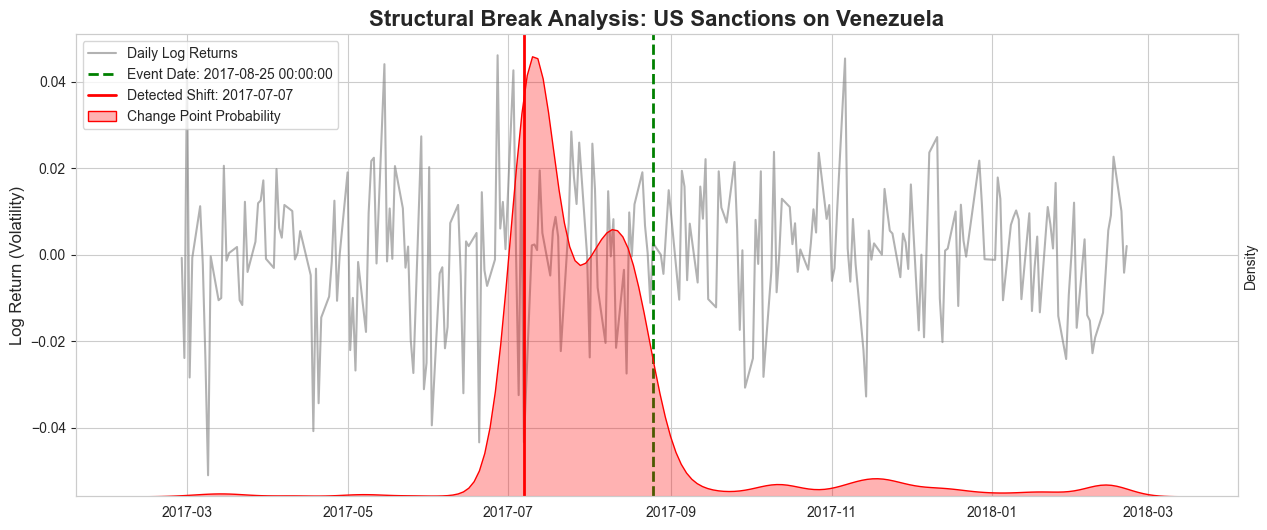

--> Processing: US Withdrawal from Iran Nuclear Deal...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: 21.14%


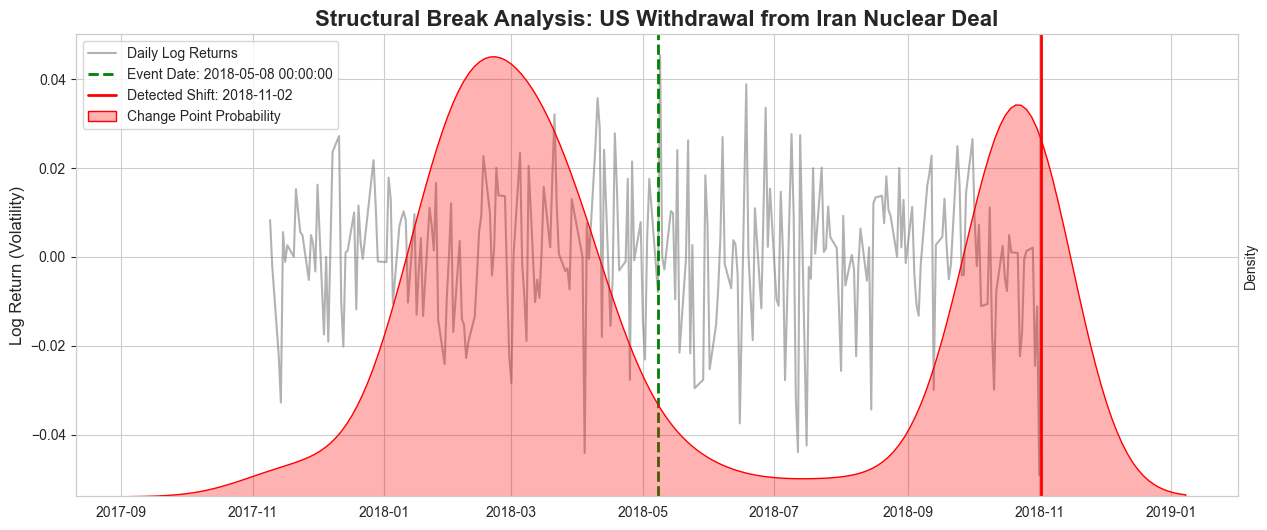

--> Processing: Saudi Aramco Facility Attack...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: 200.54%


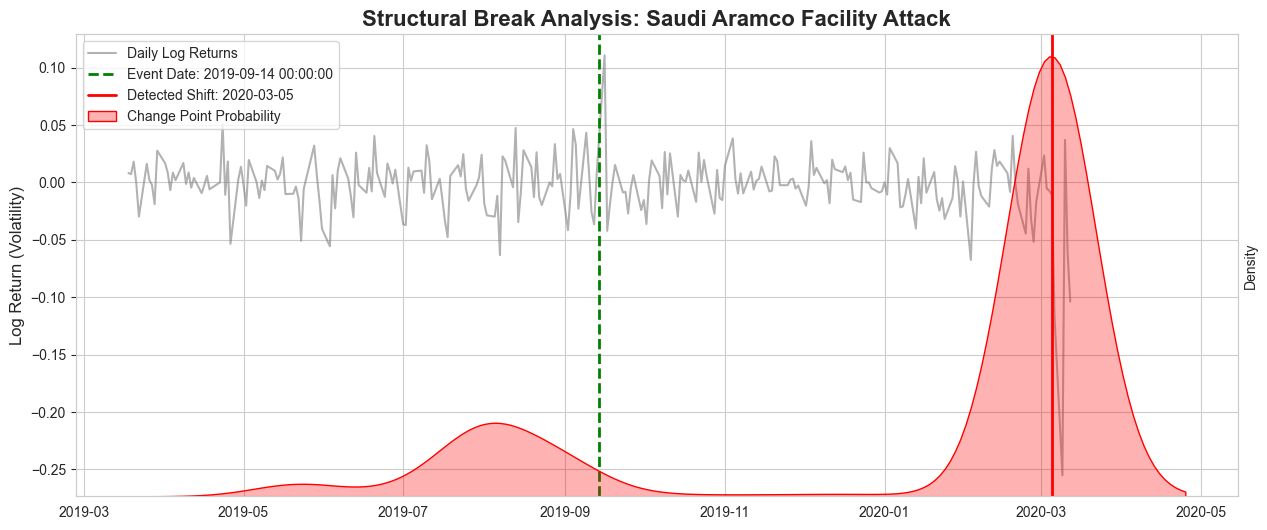

--> Processing: OPEC+ Price War...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


    [SIGNIFICANT] Volatility shift: 360.19%


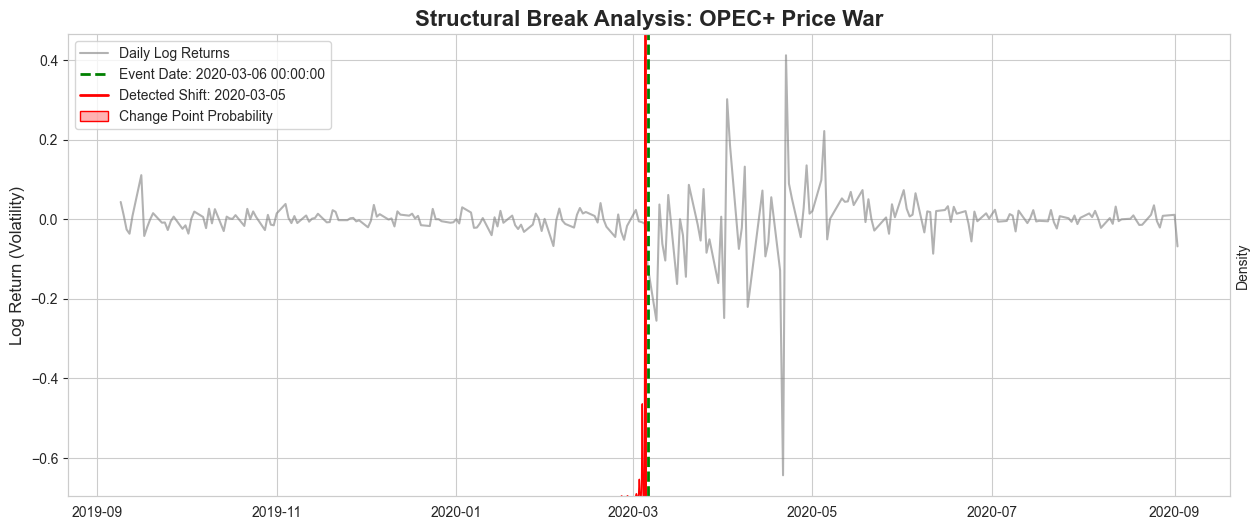

--> Processing: COVID-19 Global Lockdowns...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


    [SIGNIFICANT] Volatility shift: 362.53%


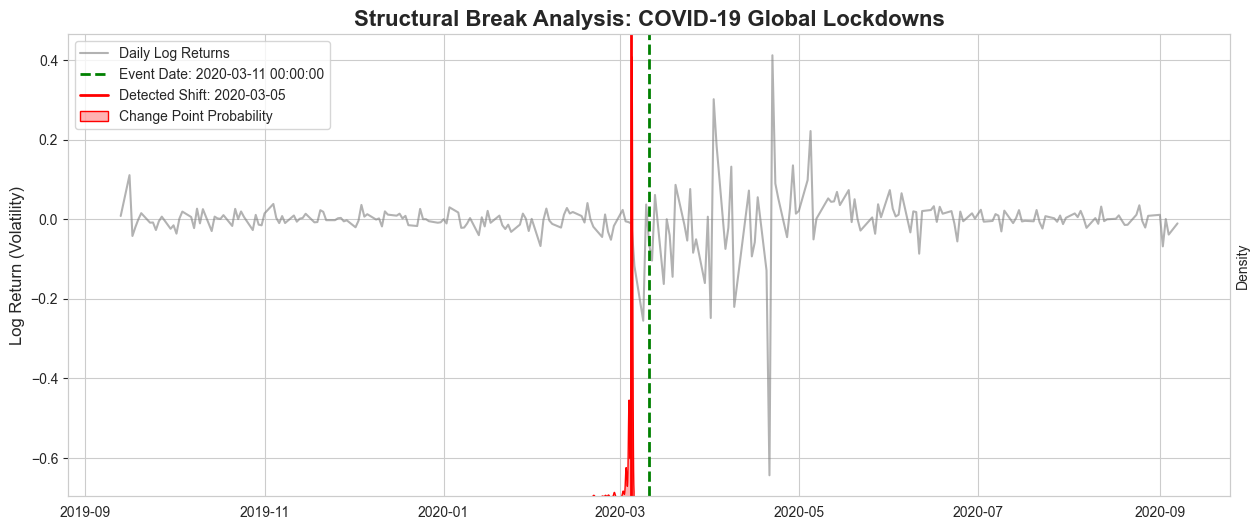

--> Processing: OPEC+ Historic Production Cuts...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: 390.35%


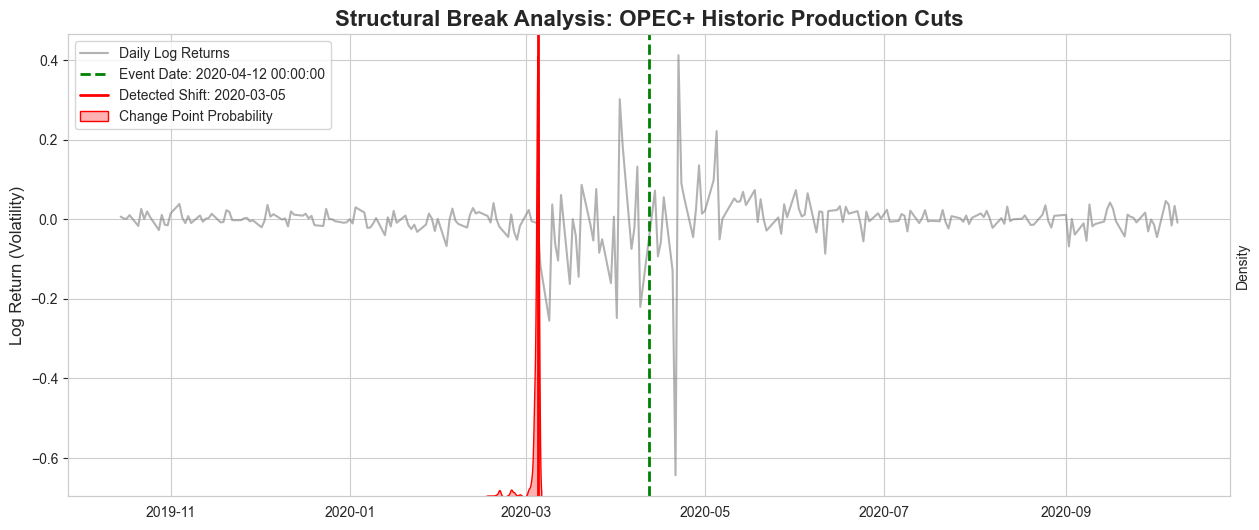

--> Processing: Post-COVID Global Economic Recovery...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
There were 233 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


    [SIGNIFICANT] Volatility shift: 40.28%


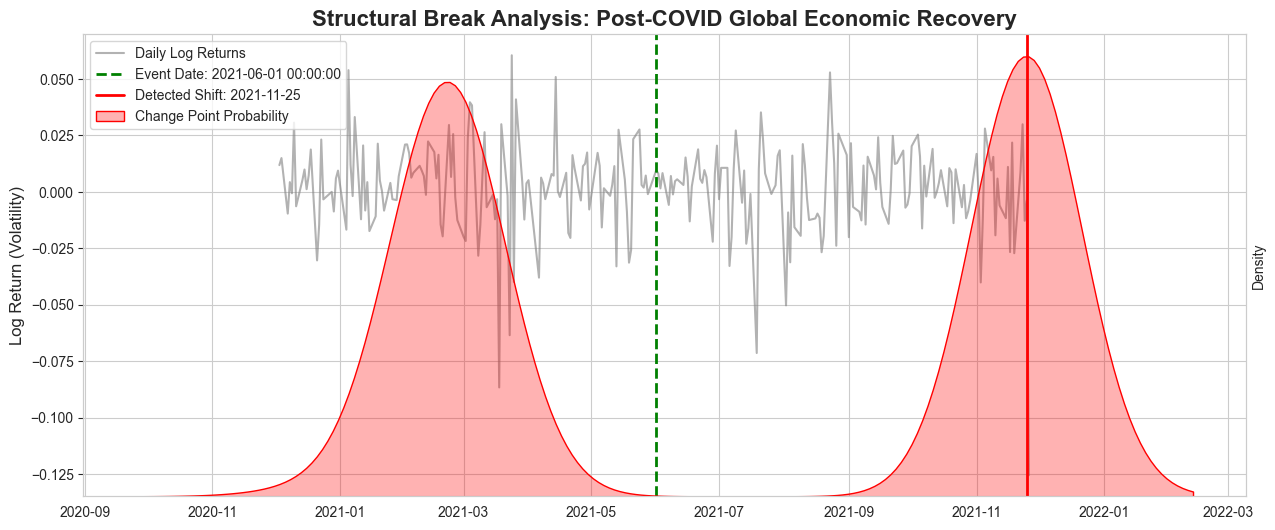

--> Processing: Russia–Ukraine Full-Scale War...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


    [SIGNIFICANT] Volatility shift: 72.42%


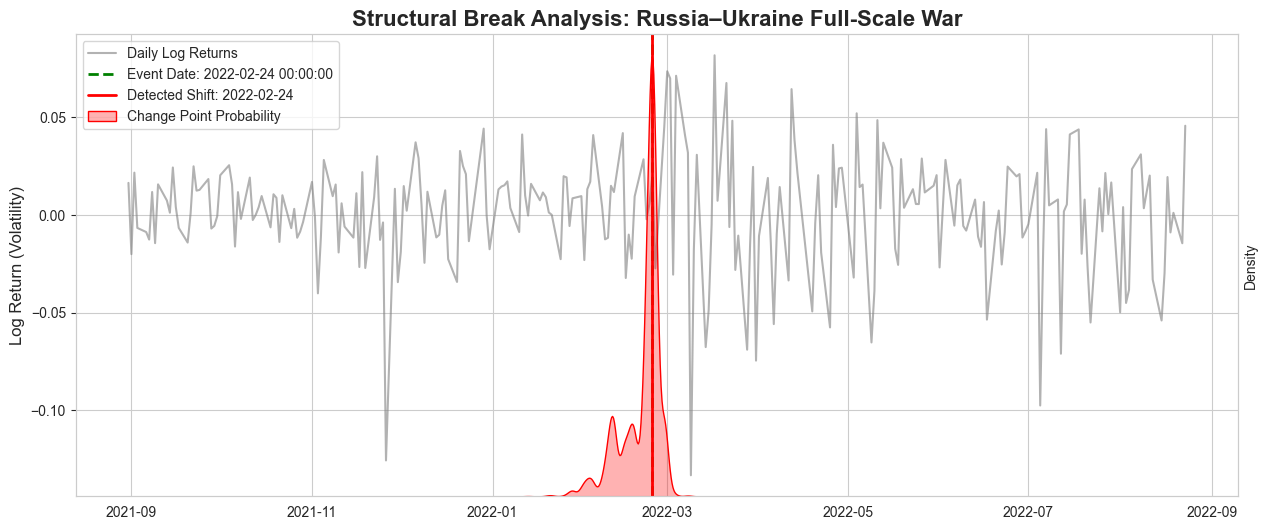

--> Processing: EU Sanctions on Russian Oil...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


    [SIGNIFICANT] Volatility shift: 68.69%


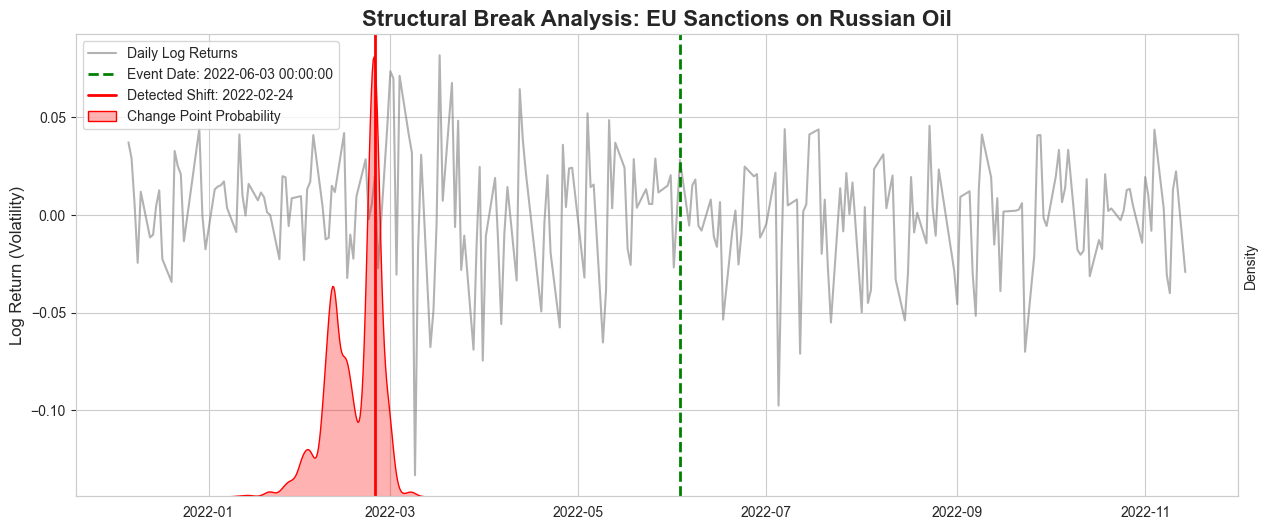


Analysis Complete.


In [4]:
results_list = []

# New Logic: Plot ANY event with >20% change, not just the hardcoded list
print(f"Starting Robust Bayesian Analysis on {len(events)} events...")

for _, row in events.iterrows():
    event_name = row['Event_Name']
    event_date = row['Date']

    print(f"--> Processing: {event_name}...")

    # Run Model
    trace, window_df = model.analyze_event(event_date, window_days=180)

    if trace is not None:
        metrics = calculate_metrics(trace, window_df, event_name, event_date)

        if metrics:
            results_list.append(metrics)
            pct_change = abs(metrics['Volatility_Change_Pct'])

            # PLOT LOGIC:
            # If volatility changed by more than 20% OR it's a famous event -> PLOT IT
            famous_events = ['First Gulf War', 'Global Financial Crisis', 'COVID-19 Global Lockdowns']

            if pct_change > 20.0 or event_name in famous_events:
                print(f"    [SIGNIFICANT] Volatility shift: {metrics['Volatility_Change_Pct']}%")
                plot_change_point(trace, window_df, event_name, event_date)
            else:
                print(f"    [Minor] Change {metrics['Volatility_Change_Pct']}% (No Plot)")

    else:
        print(f"    [Skipped] Insufficient data")

print("\nAnalysis Complete.")

In [5]:
# Convert to DataFrame
results_df = pd.DataFrame(results_list)

# Reorder columns for professional output
cols = ['Event_Name', 'Expected_Date', 'Detected_Date', 'Volatility_Change_Pct', 'Volatility_Pre', 'Volatility_Post']
results_df = results_df[cols]

# Create directory if it doesn't exist
OUTPUT_PATH.parent.mkdir(parents=True, exist_ok=True)

# Save
results_df.to_csv(OUTPUT_PATH, index=False)

print(f"Results successfully saved to: {OUTPUT_PATH}")
results_df.head(10) # Show first 10 rows

Results successfully saved to: ../results/change_point_results.csv


,Event_Name,Expected_Date,Detected_Date,Volatility_Change_Pct,Volatility_Pre,Volatility_Post
0,First Gulf War,1990-08-02,1990-07-31,204.17,0.02034,0.06185
1,Asian Financial Crisis,1997-07-02,1997-12-29,6.73,0.01719,0.01835
2,OPEC Coordinated Production Cuts,1999-03-01,1999-02-09,-28.79,0.03224,0.02296
3,September 11 Attacks,2001-09-11,2001-09-10,89.71,0.02012,0.03818
4,Iraq War,2003-03-20,2002-10-18,34.61,0.01660,0.02234
5,Global Financial Crisis,2008-09-15,2008-08-20,113.87,0.02290,0.04897
6,Arab Spring,2011-01-25,2011-05-02,38.51,0.01519,0.02104
7,Libyan Civil War,2011-02-15,2011-05-02,47.67,0.01385,0.02046
8,Iran Nuclear Sanctions,2012-01-23,2012-06-25,21.87,0.01571,0.01915
9,Russia–Ukraine Crimea Conflict,2014-03-18,2014-09-12,-18.24,0.00968,0.00791


In [6]:
import arviz as az

# --- COMPLIANCE CHECK: CONVERGENCE STATS ---
# The instructions require checking r_hat values (should be close to 1.0)
# and Effective Sample Size (ess).

if trace is not None:
    print(f"--- Convergence Statistics for {event_name} ---")

    # Generate the summary table
    summary_df = az.summary(trace, var_names=['tau', 'sigma_1', 'sigma_2'])

    # Display it
    print(summary_df)

    # Automated Check
    max_rhat = summary_df['r_hat'].max()
    if max_rhat < 1.05:
        print(f"\n✅ SUCCESS: Max r_hat is {max_rhat:.3f} (Model Converged)")
    else:
        print(f"\n⚠️ WARNING: Max r_hat is {max_rhat:.3f} (Possible Convergence Issue)")

--- Convergence Statistics for EU Sanctions on Russian Oil ---
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
tau      51.097  5.917  40.000   58.000       0.29    0.171     466.0   
sigma_1   0.019  0.002   0.016    0.023       0.00    0.000    2239.0   
sigma_2   0.033  0.002   0.030    0.036       0.00    0.000    4087.0   

         ess_tail  r_hat  
tau         441.0    1.0  
sigma_1    2096.0    1.0  
sigma_2    3130.0    1.0  

✅ SUCCESS: Max r_hat is 1.000 (Model Converged)
